In [1]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
G = nx.Graph()
df = pd.read_csv('APT-R1.csv')
df

,KERNEL32.dll,runtime_dlls,fileread,fileopen
0,GetStdHandle,c:\windows\system32\riched20.dll,C:\b2ab87d5408a19b0d65d49b74c0f3d879ac55c3e571...,C:\b2ab87d5408a19b0d65d49b74c0f3d879ac55c3e571...
1,FileTimeToSystemTime,ole32.dll,NaN,NaN
2,WaitForSingleObject,comctl32.dll,NaN,NaN
3,FindNextFileA,NaN,NaN,NaN
4,EncodePointer,NaN,NaN,NaN
...,...,...,...,...
129,UnmapViewOfFile,NaN,NaN,NaN
130,GetTempPathW,NaN,NaN,NaN
131,Sleep,NaN,NaN,NaN
132,GetOEMCP,NaN,NaN,NaN


In [3]:
df = df.fillna('Unknown')
columns = df.columns
columns

Index(['KERNEL32.dll', 'runtime_dlls', 'fileread', 'fileopen'], dtype='object')

In [4]:
title = 'R1'
G.add_node(title, color='blue')

for column in columns:
    G.add_node(column, color='red')
    G.add_edge(column, title)
    G.add_nodes_from(df[column], color='yellow')
    for index, row in df.iterrows():
        G.add_edge(column, row[column])

In [5]:
G.remove_node("Unknown")

/usr/local/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


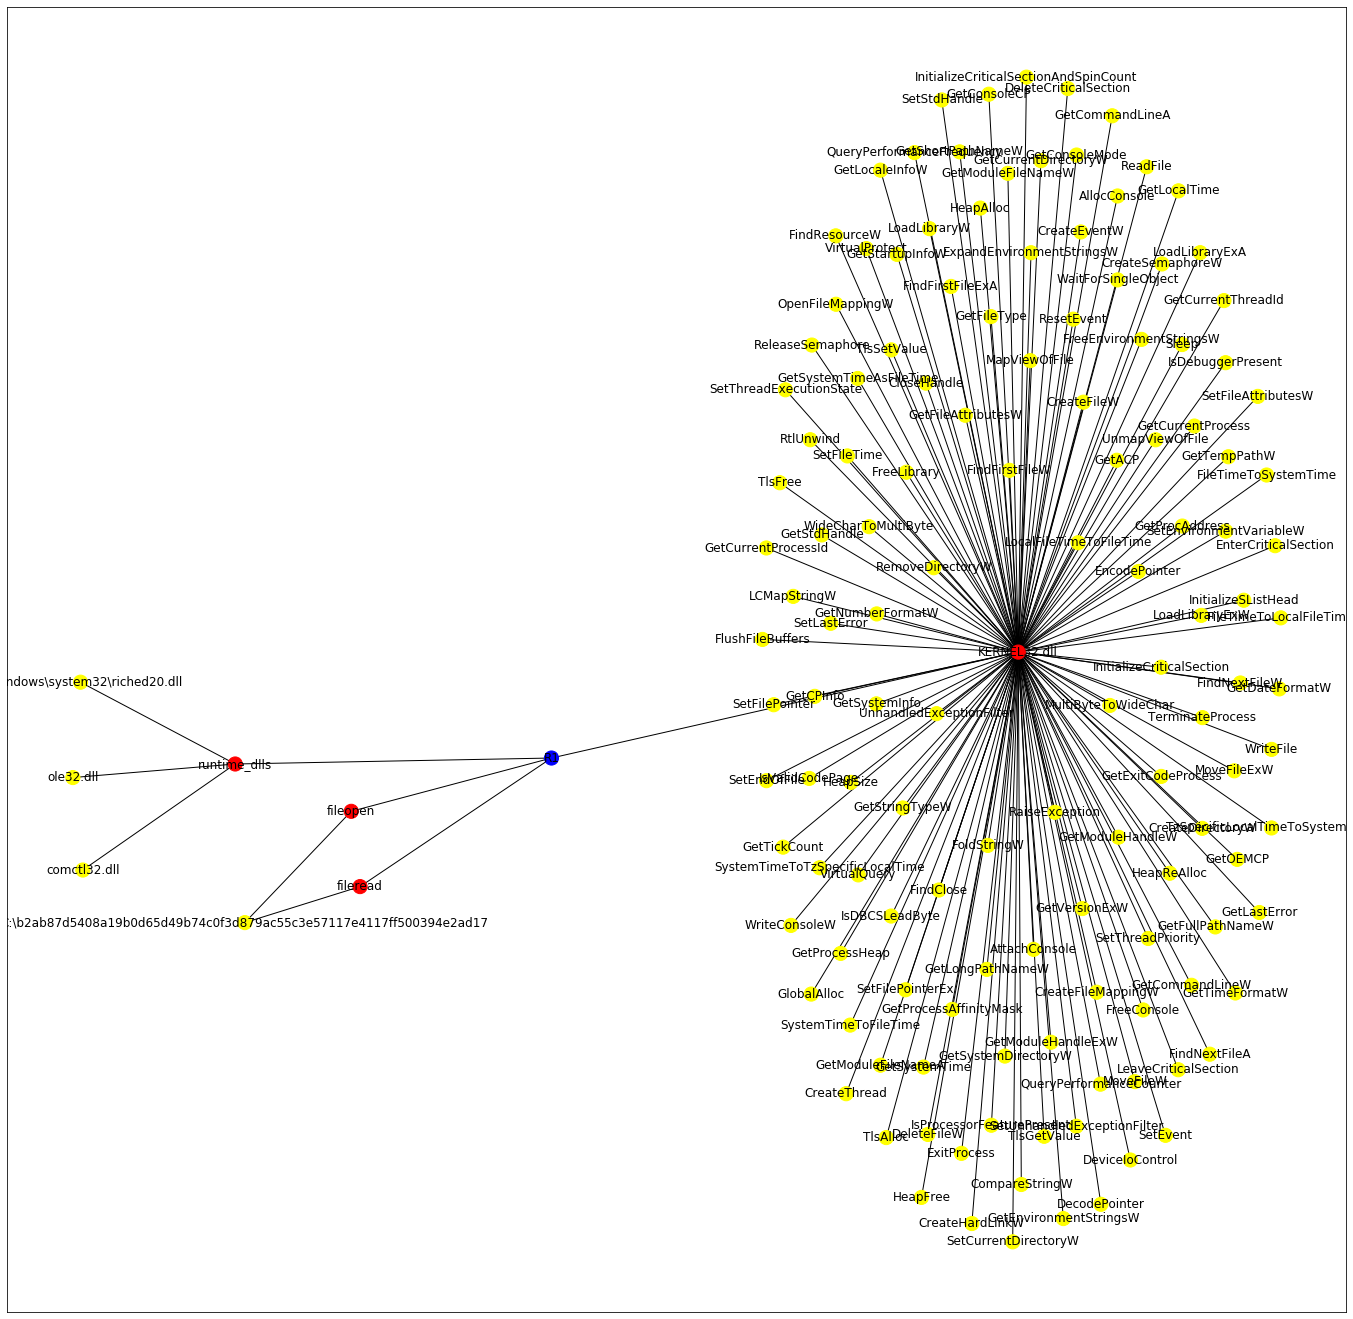

In [6]:
color_map =[]
plt.figure(1, figsize=(24,24))
for n in G.nodes():
    color_map.append(G.node[n]['color'])
pic = nx.draw_networkx(G, node_color = color_map, with_labels=True, node_size = 200)
plt.show()

In [7]:
nx.write_edgelist(G, 'edgelist/R1.edgelist')

In [8]:
nx.write_gexf(G, 'edgelist/R1.gexf')

In [ ]:
G = networkx.Graph()